In [1]:
# Import Modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
import statistics
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer
from mpl_toolkits.mplot3d import Axes3D
from itertools import combinations
from itertools import permutations
from scipy.spatial.distance import pdist, squareform
from scipy.ndimage import zoom

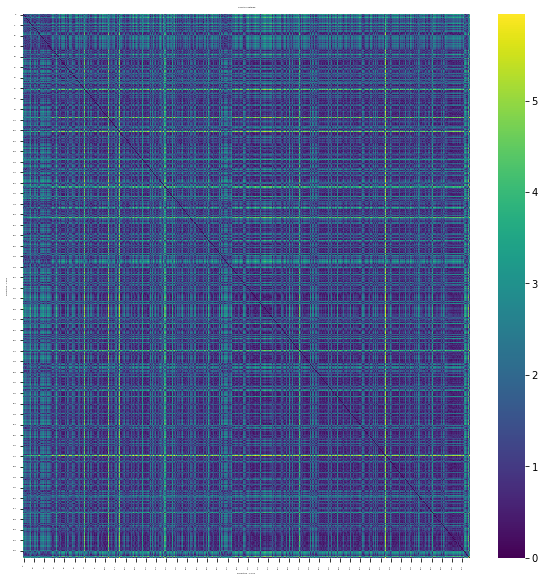

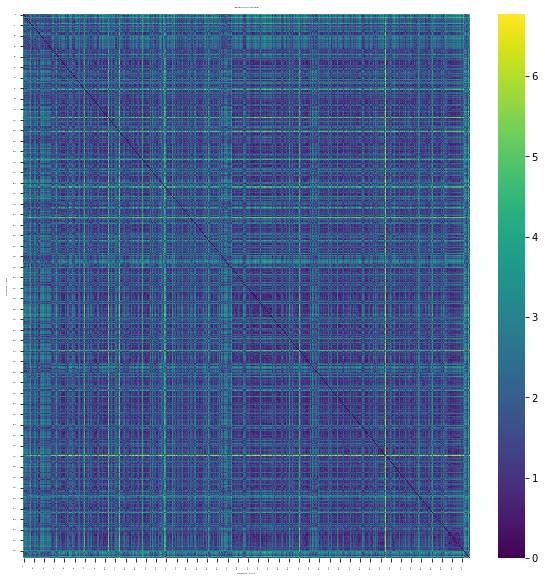

In [2]:
# Read COMAD 2 dim dist matrix
COMAD = 'COMAD-BC.csv' 
COMAD_csv = pd.read_csv(COMAD)

# Read MEAN PCA 2 dim  dist matrix
MEAN_PCA = 'PCA-MEAN-BC.csv' 
MEAN_PCA_csv = pd.read_csv(MEAN_PCA)

# Read naming columns
columns = 'columns_heatmap.csv' 
columns_csv = pd.read_csv(columns)

dist_matrices = [COMAD_csv, MEAN_PCA_csv]
method_names = ['COMAD heatmap', 'Traditional PCA heatmap']

for i,j in zip(dist_matrices,method_names):
    plt.figure(figsize=(10, 10))
    sns.heatmap(i, cmap='viridis', annot=False, annot_kws={"size": 10})

    title_fontsize = 2
    label_fontsize = 2

    plt.title(f'{j}', fontsize=title_fontsize)
    plt.xlabel('Projection - X axis', fontsize=label_fontsize)
    plt.ylabel('Projection - Y axis', fontsize=label_fontsize)

    ax = plt.gca()
    ax.tick_params(axis='x', labelsize=label_fontsize)
    ax.tick_params(axis='y', labelsize=label_fontsize)

    plt.show()

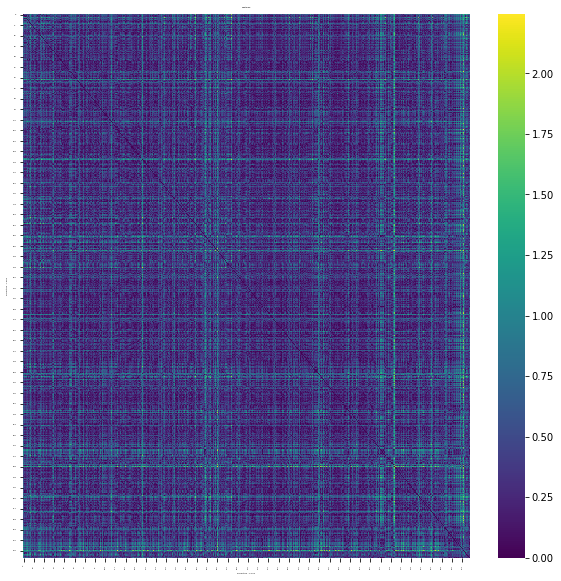

In [3]:
# Calculate the absolute difererce of 2 dist matrices andplot heatmap
abs_diff_dist_matrices = (COMAD_csv - MEAN_PCA_csv).abs()

# Normalize the DataFrame to get percentages
normalized = abs_diff_dist_matrices / abs_diff_dist_matrices.sum().sum() * 100

plt.figure(figsize=(10, 10))
sns.heatmap(abs_diff_dist_matrices, cmap='viridis', annot=False, annot_kws={"size": 10},fmt='.2f')

title_fontsize = 2
label_fontsize = 2

plt.title('Heatmap', fontsize=title_fontsize)
plt.xlabel('Projection - X axis', fontsize=label_fontsize)
plt.ylabel('Projection - Y axis', fontsize=label_fontsize)

ax = plt.gca()
ax.tick_params(axis='x', labelsize=label_fontsize)
ax.tick_params(axis='y', labelsize=label_fontsize)

plt.show()

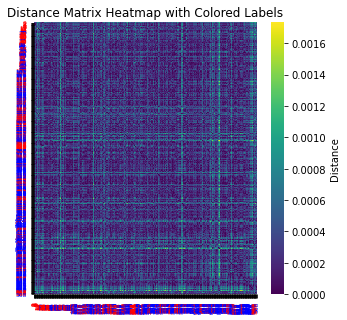

In [4]:
# Create a custom color mapping based on the species
species_color_mapping = columns_csv['diagnosis'].map({'M': 'red', 'B': 'blue'})

# Plot the distance matrix heatmap with colored labels
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(normalized, cmap='viridis', ax=ax,
            cbar_kws={'label': 'Distance'})

# Set the tick labels and colors
ax.set_xticks(np.arange(normalized.shape[0]) + 0.5)
ax.set_yticks(np.arange(normalized.shape[0]) + 0.5)
ax.set_xticklabels(species_color_mapping.index, rotation=90, fontsize=6)
ax.set_yticklabels(species_color_mapping.index, rotation=0, fontsize=6)

# Color the tick labels
for tick, color in zip(ax.get_xticklabels(), species_color_mapping):
    tick.set_color(color)

for tick, color in zip(ax.get_yticklabels(), species_color_mapping):
    tick.set_color(color)

# Show the plot
plt.title('Distance Matrix Heatmap with Colored Labels')
plt.show()

In [5]:
def overall_difference_percentage(matrix1, matrix2):
    # Calculate the Frobenius norms
    norm_difference = np.linalg.norm(matrix1 - matrix2)
    norm_average = np.linalg.norm((matrix1 + matrix2) / 2)
    
    # Return the percentage difference
    return (norm_difference / norm_average) * 100

overall_diff_percentage = overall_difference_percentage(MEAN_PCA_csv, COMAD_csv)
print(overall_diff_percentage)

25.415368994664


In [6]:
# Dataframe Compare
knn_comad_csv = pd.read_csv('knn_comad_pca.csv')
knn_mean_csv = pd.read_csv('knn_mean_pca.csv')

# DF compare
df_compare = knn_mean_csv.compare(knn_comad_csv, align_axis=1)
df_compare = df_compare.rename(columns={'self': 'MEAN', 'other': 'COMAD'}, level=-1)

df_compare

ID             Diagnosis       Point No knn         \
         MEAN       COMAD      MEAN COMAD         MEAN  COMAD   
0     91858.0    924632.0       NaN   NaN        530.0  554.0   
1    864685.0    868202.0         B     M        115.0  135.0   
2    905501.0    861648.0       NaN   NaN        409.0   90.0   
3    905686.0  88147202.0       NaN   NaN        415.0  228.0   
4    903554.0    911654.0       NaN   NaN        394.0  476.0   
5   9010598.0    911150.0       NaN   NaN        362.0  448.0   
6   8610908.0    869224.0       NaN   NaN         79.0  143.0   
7     87930.0    922576.0       NaN   NaN        204.0  545.0   
8   8612080.0     87930.0       NaN   NaN         84.0  204.0   
9    862009.0    922297.0       NaN   NaN         93.0  544.0   
10   922297.0    906878.0       NaN   NaN        544.0  423.0   
11  9110720.0     91858.0       NaN   NaN        445.0  530.0   
12   908916.0   9111843.0       NaN   NaN        436.0  452.0   
14  8711003.0    914333.0       NaN   NaN        155.0  495.0   
15   906539.0    905686.0       NaN   NaN        420.0  415.0   
16  8910506.0    861597.0       NaN   NaN        268.0   88.0   
17  9011495.0    862009.0       NaN   NaN        367.0   93.0   
18   861597.0   8610908.0       NaN   NaN         88.0   79.0   
19   891703.0    912519.0       NaN   NaN        293.0  482.0   

   Point No Dist Matrix         
                   MEAN  COMAD  
0                 530.0  554.0  
1                 115.0  135.0  
2                 409.0   90.0  
3                 415.0  228.0  
4                 394.0  476.0  
5                 362.0  448.0  
6                  79.0  143.0  
7                 204.0  545.0  
8                  84.0  204.0  
9                  93.0  544.0  
10                544.0  423.0  
11                445.0  530.0  
12                436.0  452.0  
14                155.0  495.0  
15                420.0  415.0  
16                268.0   88.0  
17                367.0   93.0  
18                 88.0   79.0  
19                293.0  482.0

In [7]:
# Load the csv files
knn_comad_csv = pd.read_csv('knn_comad_pca.csv')
knn_mean_csv = pd.read_csv('knn_mean_pca.csv')

# Reset index for both DataFrames
knn_comad_csv.reset_index(drop=True, inplace=True)
knn_mean_csv.reset_index(drop=True, inplace=True)

# Create an empty DataFrame for the comparison results
df_compare = pd.DataFrame()
    
df_compare['MEAN_Diagnosis'] = knn_mean_csv['Diagnosis']
df_compare['COMAD_Diagnosis'] = knn_comad_csv['Diagnosis']

# Check if 'Point No.' are equal
df_compare['ID Match ?'] = np.where(knn_comad_csv['Point No Dist Matrix'] == knn_mean_csv['Point No Dist Matrix'], 'True', 'False')

# Check if 'Diagnosis' are equal
df_compare['Diagnosis Match ?'] = np.where(knn_comad_csv['Diagnosis'] == knn_mean_csv['Diagnosis'], 'True', 'False')

df_compare

,MEAN_Diagnosis,COMAD_Diagnosis,ID Match ?,Diagnosis Match ?
0,B,B,False,True
1,B,M,False,False
2,B,B,False,True
3,B,B,False,True
4,B,B,False,True
5,B,B,False,True
6,B,B,False,True
7,B,B,False,True
8,B,B,False,True
9,B,B,False,True


In [8]:
knn_comad_csv.columns

Index(['Neighbor', 'ID', 'Diagnosis', 'Point No knn', 'Point No Dist Matrix'], dtype='object')